### Vamos aprender a clusterizar com K-means

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

##### Antes faziamos assim:

In [18]:
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
X = df.drop(columns=['target'])
y = df['target']

##### Atalho para atribuir X e y

In [19]:
X,y = load_iris(return_X_y=True,as_frame=True)

In [20]:
# Selecionando apenas as colunas de pétala
X = X.loc[:,['petal length (cm)','petal width (cm)']]

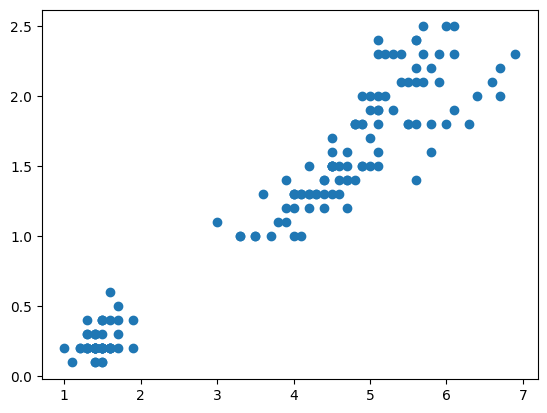

In [21]:
# Visualizando graficamente os pontos

fig, ax = plt.subplots()
ax.scatter(X['petal length (cm)'], X['petal width (cm)'])
plt.show()

- **Utilizando o K-means**
    - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [1]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)

NameError: name 'X' is not defined

In [26]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

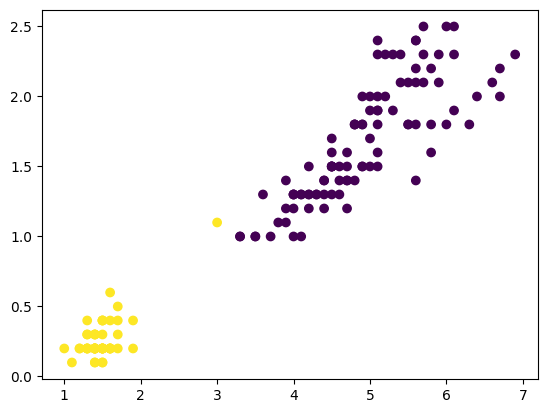

In [27]:
fig, ax = plt.subplots()
ax.scatter(X['petal length (cm)'], X['petal width (cm)'], c=kmeans.labels_)
plt.show()

##### k=3

c:\Users\caim_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


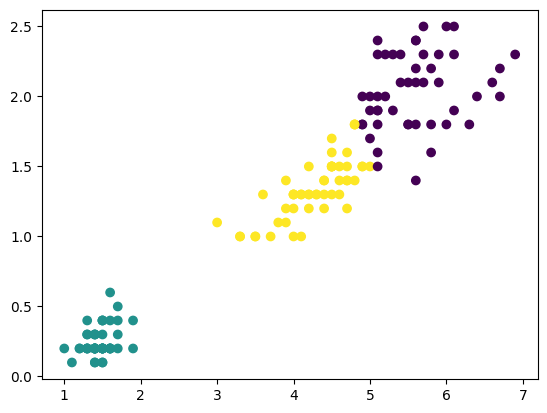

In [29]:
K = 3
kmeansK = KMeans(n_clusters=K, random_state=42).fit(X)
kmeansK.labels_
fig, ax = plt.subplots()
ax.scatter(X['petal length (cm)'], X['petal width (cm)'], c=kmeansK.labels_)
plt.show()

##### K=4

c:\Users\caim_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


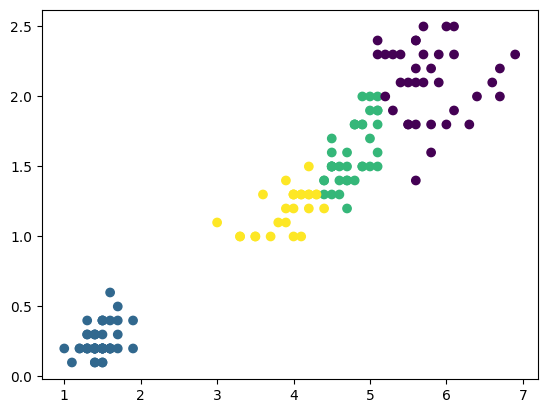

In [30]:
K = 4
kmeansK = KMeans(n_clusters=K, random_state=42).fit(X)
kmeansK.labels_
fig, ax = plt.subplots()
ax.scatter(X['petal length (cm)'], X['petal width (cm)'], c=kmeansK.labels_)
plt.show()

##### K=5

c:\Users\caim_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


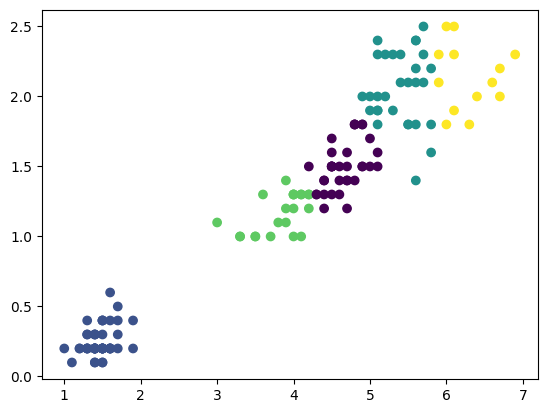

In [31]:
K = 5
kmeansK = KMeans(n_clusters=K, random_state=42).fit(X)
kmeansK.labels_
fig, ax = plt.subplots()
ax.scatter(X['petal length (cm)'], X['petal width (cm)'], c=kmeansK.labels_)
plt.show()

#### Como saber o K ideal?
##### Podemos utilizar "método cotovelo"

##### O método cotovelo consiste em verificar a inercia de vários valores K diferentes e encontrar qual a que mais se adequa a nossa clusterização

##### abaixo vou armazenar na variável valores_k uma lista de 1 até 14, vou rodar um loop for para captar a inercia referente a cada um e também armazenar numa lista

In [33]:
# Percorrendo diferentes valores de K
valores_k = []
inercias = []

for i in range(1,15):
    kmeans = KMeans(n_clusters=i,random_state=0, n_init='auto').fit(X)
    valores_k.append(i)
    inercias.append(kmeans.inertia_) 

In [36]:
inercias

[550.8953333333334,
 86.39021984551395,
 31.371358974358984,
 20.238882783882786,
 14.130893864755937,
 11.090774889156014,
 9.523565023670287,
 8.125074352548037,
 7.9946252334267065,
 7.176194677871148,
 5.821179487179489,
 4.892833676127793,
 4.702341612635729,
 4.373991129785247]

### Vamos verificar pareando a inercia com os valores em um gráfico e encontrar onde começa "o cotovelo"

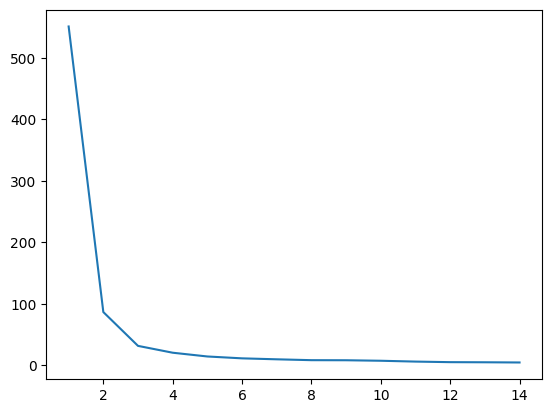

In [37]:
fig, ax = plt.subplots()

ax.plot(valores_k,inercias)

plt.show()

##### k=2 e k=3 são os mais interessantes para nós

##### Vamo "colar"

c:\Users\caim_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


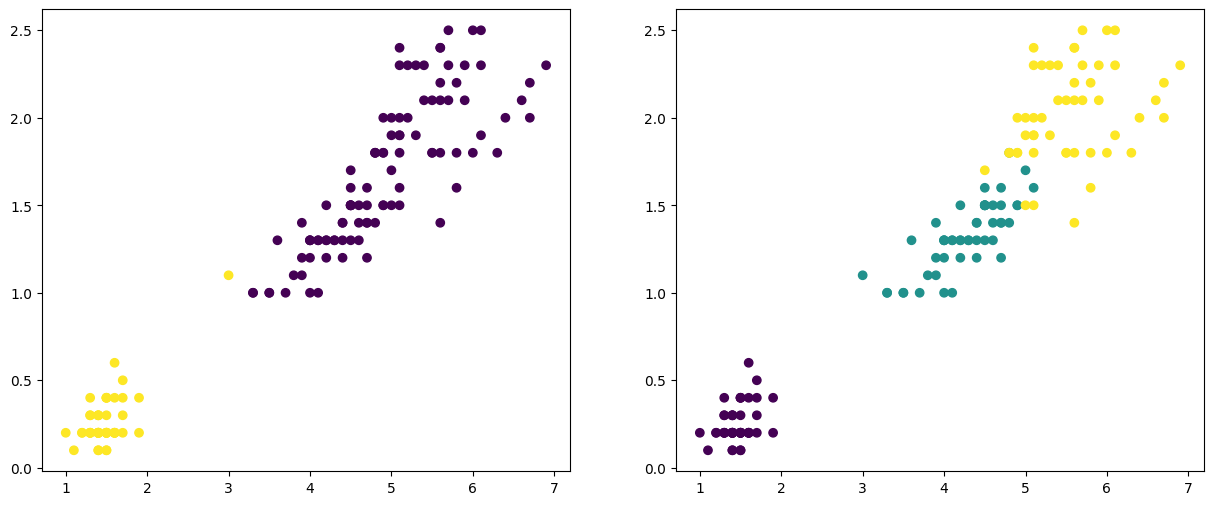

In [42]:
K=2
kmeansK = KMeans(n_clusters=K, random_state=42).fit(X)


fig, ax = plt.subplots(ncols=2,figsize=(15,6))

ax[0].scatter(X['petal length (cm)'], X['petal width (cm)'],c=kmeansK.labels_)
ax[1].scatter(X['petal length (cm)'], X['petal width (cm)'],c=y)

plt.show()

### Para sabermos o K ideal precisamos verificar o adjusted_rand_score
#### (é algo como a acurácia)

In [43]:
K=2
kmeansK = KMeans(n_clusters=K, random_state=42).fit(X)

from sklearn import metrics
metrics.adjusted_rand_score(y,kmeansK.labels_)

c:\Users\caim_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5583714437541352

##### Agora com k=3

In [49]:
K=3
kmeansK = KMeans(n_clusters=K, random_state=42).fit(X)

from sklearn import metrics
metrics.adjusted_rand_score(y,kmeansK.labels_)

c:\Users\caim_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.8856970310281228

#### Vou fazer com vários K para testarmos a visualização:

In [51]:
valores_k = []
ARI = []

for i in range(1,15):
    kmeans = KMeans(n_clusters=i,random_state=0, n_init='auto').fit(X)
    valores_k.append(i)
    ARI.append(metrics.adjusted_rand_score(y,kmeans.labels_)) 

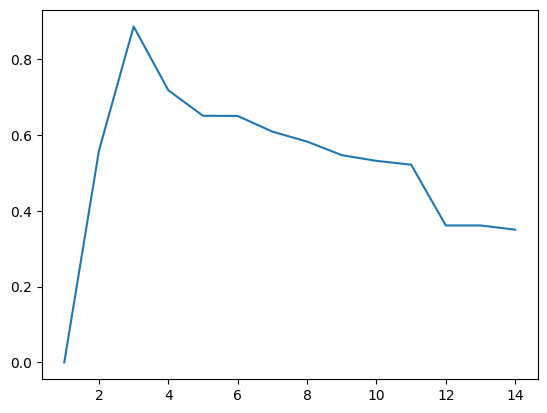

In [52]:
fig, ax = plt.subplots()

ax.plot(valores_k,ARI)

plt.show()